# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [1]:
import os
import numpy as np
from Lab_Analyses.Dual_Plane.organize_dual_plane_data import organize_dual_plane_data
from Lab_Analyses.Dual_Plane.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Dual_Plane import plot_dual_plane_data as plotting
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [2]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"
id_3 = "JW152"

mouse_list = [id_1, id_2]


### Data Organization
Organize the dual plane data

In [3]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
for mouse in mouse_list:
    organize_dual_plane_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, reprocess=reprocess, save=True)

### Analyze dual plane data

In [4]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["analyzed_dual_plane_data"], path=dual_plane_path)[0]

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Utilities\data_utilities.py:168: RuntimeWarning: Mean of empty slice
  m = np.nanmean(value, axis=1)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\core\_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


### Visualize Data

In [5]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

<IPython.core.display.Javascript object>


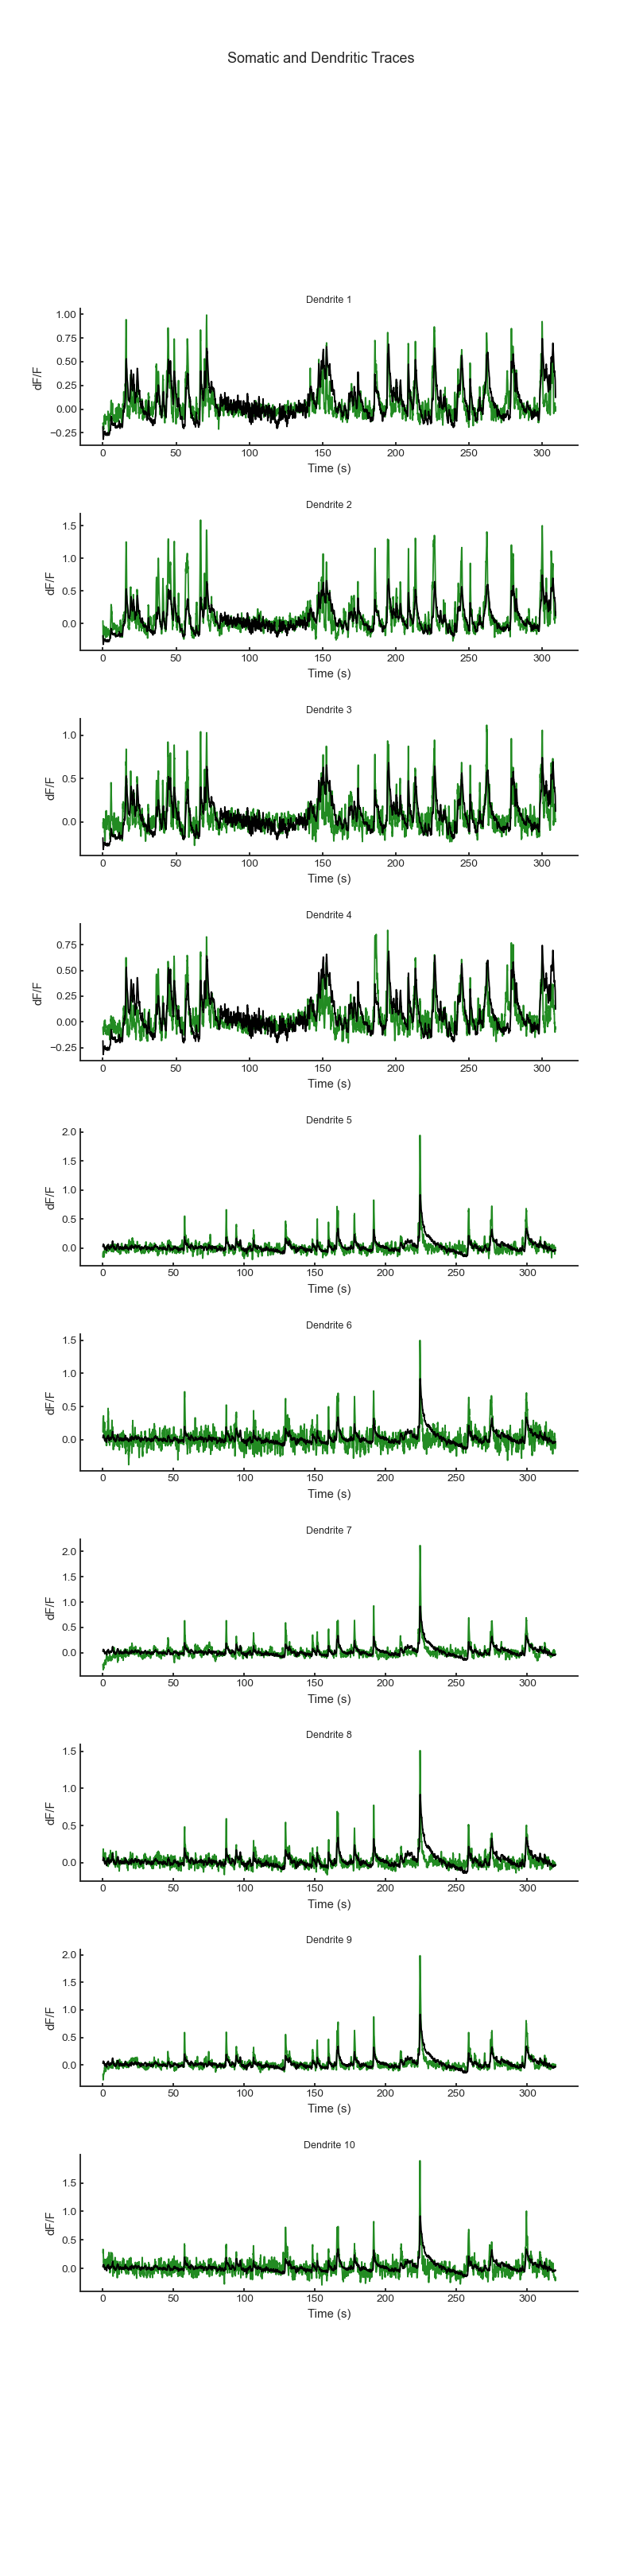

In [6]:
# Plot the traces
plotting.plot_soma_dend_traces(
    dual_plane_data,
    colors=["forestgreen", "black"],
    norm=False,
    subselect=None, 
    save=False, 
    save_path=fig_path,
)

<IPython.core.display.Javascript object>


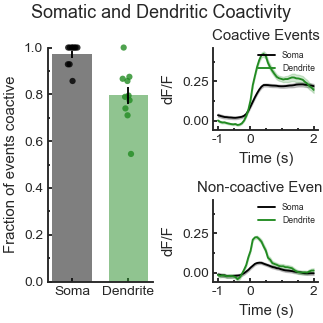

In [7]:
# Plot fraction coactivity
plotting.plot_soma_dend_coactivity(
    dual_plane_data,
    colors=["black", "forestgreen"],
    mean_type="mean", 
    err_type="sem",
    norm=False,
    trace_avg="all",
    figsize=(4,4),
    save=False,
    save_path=fig_path,
)

<IPython.core.display.Javascript object>


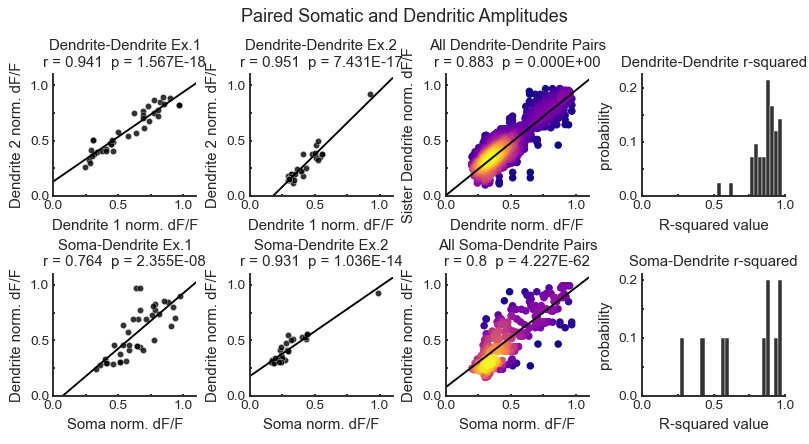

In [14]:
# Plot paired event amplitudes
plotting.plot_amplitude_correlations(
    dual_plane_data,
    norm=True,
    dend_examples=[1,5],
    soma_examples=[1,5],
    color=["black", "black"],
    figsize=(10, 5.5),
    corr_lim=(0,1.1),
    s_size=25,
    s_alpha=0.8,
    bins=25,
    save=False,
    save_path=fig_path,
)

In [ ]:
amps = []
for i, x in enumerate(dual_plane_data.other_dendrite_amplitudes_norm):
    for j in x:
        amps.append(dual_plane_data.dendrite_amplitudes_norm[i])

In [ ]:
np.concatenate(amps).shape

In [ ]:
np.concatenate([np.concatenate(x) for x in dual_plane_data.other_dendrite_amplitudes_norm]).shape